# Exploring the Rosetta Stone of Human Capital


### CHRYSOULA DIKONIMAKI 3170039

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from plotnine import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats
import scipy.stats.stats as stats

%matplotlib inline

First of all, we will download the results of the study from: https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx 

In [2]:
country_scores = pd.read_excel(
    'https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx',
    sheet_name='Country Scores')

In [3]:
country_scores.head(5)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


In [4]:
# renaming columns for easier access
header = country_scores.columns

country_scores = country_scores.rename(columns={header[0]: "country_name" ,header[1]: "iso_3", header[2]: "TIMSS_perc",header[3]: "PIRLS_perc",
                              header[4]:"TIMSS_score",header[5]:"PIRLS_score"})
country_scores.head(5)

,country_name,iso_3,TIMSS_perc,PIRLS_perc,TIMSS_score,PIRLS_score
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


Also, we will read all the necessary data files:

In [5]:
usa = pd.read_csv('usa_00001.csv.gz', 
                  sep=",", index_col=False, encoding='latin-1', compression='gzip')
usa.head(5)

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877


In [6]:
baci = pd.read_csv('BACI_HS17_Y2018_V202001.csv.gz', 
                  sep=",", index_col=False, compression='gzip')

# renaming columns for easier access
header = baci.columns

baci = baci.rename(columns={header[0]: "year" ,header[1]: "exporter", header[2]: "importer",
                                                header[3]: "product_category", header[4]:"trade_flow",header[5]:"quantity"})
baci.head(5)

,year,exporter,importer,product_category,trade_flow,quantity
0,2018,4,24,845420,101.397000,26.000
1,2018,4,24,848180,2.328000,0.007
2,2018,4,31,570110,1.596000,0.037
3,2018,4,32,340319,8.699331,0.113
4,2018,4,32,610910,1.098000,0.013


In [7]:
codes = pd.read_csv('country_codes_V202001.csv.gz', 
                  sep=",", index_col=False, encoding='latin-1', compression='gzip')
codes.head(5)

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND


In [8]:
# renaming columns for easier access
header = codes.columns

codes = codes.rename(columns={header[3]: "iso_2", header[4]: "iso_3"})

### Q1: Income and Test Results

In [9]:
# getting WDI_data.csv
with ZipFile('Replication Files.zip') as myzip:
    income_per_country = pd.read_csv(myzip.open('Replication Files/DATA/WDI_data.csv'), 
                      sep=",", index_col=False, skipfooter=5)

# renaming columns for easier access
header = income_per_country.columns

income_per_country = income_per_country.rename(columns={header[0]: "country_name", header[1]: "iso_3",header[-1]:"income"})

income_per_country.head(5)

c:\users\xrisa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


,country_name,iso_3,Series Name,Series Code,income
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266


Getting GDP data:

In [10]:
GDP_per_country = income_per_country[income_per_country['Series Name'].str.startswith('GDP')].reset_index(drop=True)
GDP_per_country.head(5)

,country_name,iso_3,Series Name,Series Code,income
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
3,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
4,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..


In [11]:
GDP_per_country.income = pd.to_numeric(GDP_per_country.income, errors='coerce')
GDP_per_country = GDP_per_country[~GDP_per_country.income.isnull()]

In [12]:
# appropriate mergings
country_scores = GDP_per_country.merge(country_scores,
                                how='inner',
                              on=['iso_3'])
country_scores = codes.merge(country_scores,
                              how='right',
                              on=['iso_3'])

In [13]:
# applying log
country_scores.income = np.log(country_scores.income)

Relationship between TIMSS_score and income:

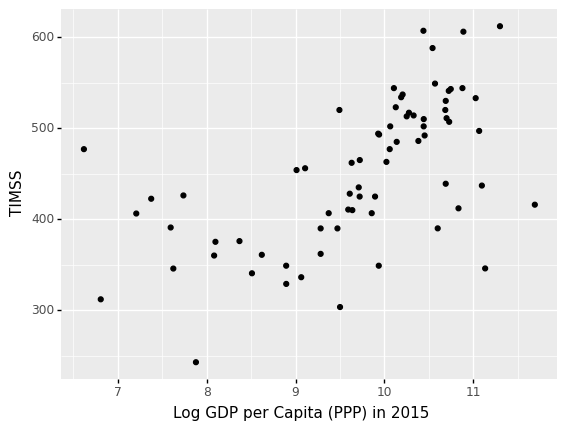

<ggplot: (-9223371905477241636)>

In [14]:
ggplot(data=country_scores) + \
    geom_point(mapping=aes(x='income', y='TIMSS_score'), na_rm=True) + \
        xlab('Log GDP per Capita (PPP) in 2015') +ylab('TIMSS')

In [15]:
country_scores.sort_values(by='income', inplace=True)
country_scores.reset_index(drop=True, inplace=True)

mod = smf.ols("TIMSS_score~income", data=country_scores)
TIMSS_res = mod.fit()
TIMSS_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TIMSS_score   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        23:14:02   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
income        41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

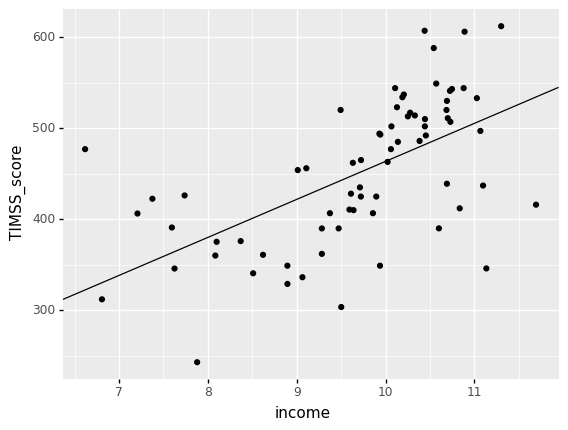

<ggplot: (-9223371905575379036)>

In [16]:
ggplot(data=country_scores) +\
    geom_point(mapping=aes(x='income', y='TIMSS_score'), na_rm=True) +\
    geom_abline(intercept=TIMSS_res.params['Intercept'], 
                slope=TIMSS_res.params['income'])

As we can see from the data, there is an upward trend between the income and the TIMSS_score, for both predictions and real values. However, R-squared is small so the predictions don't fit enought good. Also, the p-value is big so it isn't statistically significant.

Relationship between PIRLS_score and income:

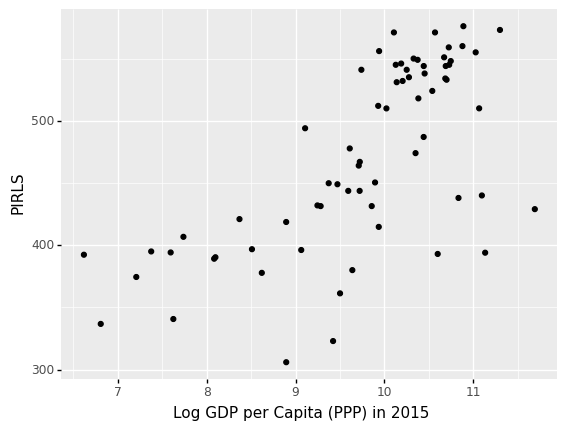

<ggplot: (-9223371905575378956)>

In [17]:
ggplot(data=country_scores) + \
    geom_point(mapping=aes(x='income', y='PIRLS_score'), na_rm=True) + \
        xlab('Log GDP per Capita (PPP) in 2015') +ylab('PIRLS')

In [18]:
mod = smf.ols("PIRLS_score~income", data=country_scores)
PIRLS_res = mod.fit()
PIRLS_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PIRLS_score   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        23:14:03   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
income        43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

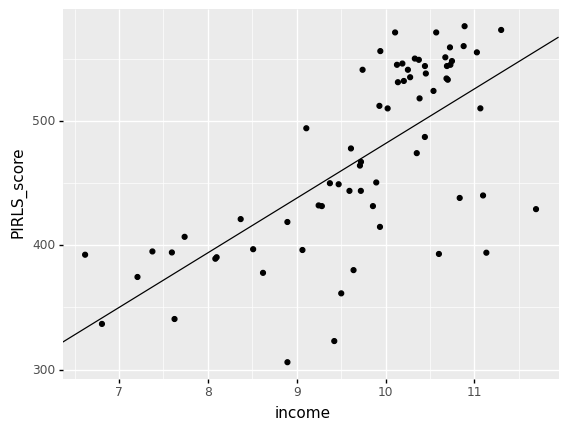

<ggplot: (-9223371905575320292)>

In [19]:
ggplot(data=country_scores) +\
    geom_point(mapping=aes(x='income', y='PIRLS_score'), na_rm=True) +\
    geom_abline(intercept=PIRLS_res.params['Intercept'], 
                slope=PIRLS_res.params['income'])

As we can see from the data, there is an upward trend between the income and the PIRLS_score, for both predictions and real values. However, R-squared is small so the predictions don't fit enought good. Also, the p-value is big so it isn't statistically significant.

In [20]:
# add residuals
country_scores['TIMSS_resid'] = TIMSS_res.resid.to_frame().rename(columns={0: 'TIMSS_resid'})
country_scores['PIRLS_resid'] = PIRLS_res.resid.to_frame().rename(columns={0: 'PIRLS_resid'})

### Q2: Years of Schooling and Test Scores

In [21]:
# getting BL2013_MF1599_v2.2.dta
with ZipFile('Replication Files.zip') as myzip:
    years_of_schooling = pd.read_stata(myzip.open('Replication Files/DATA/BL2013_MF1599_v2.2.dta'),
                                       columns=['country','year','yr_sch','WBcode'])
    

# renaming columns for easier access
header = years_of_schooling.columns

years_of_schooling = years_of_schooling.rename(columns={header[3]: "iso_3"})

years_of_schooling.head(5)

,country,year,yr_sch,iso_3
0,Algeria,1950.0,0.846457,DZA
1,Algeria,1955.0,0.835015,DZA
2,Algeria,1960.0,0.880083,DZA
3,Algeria,1965.0,1.096061,DZA
4,Algeria,1970.0,1.554976,DZA


In [22]:
# year==2010
years_of_schooling = years_of_schooling[years_of_schooling.year==2010]
years_of_schooling.drop(labels=['year'],inplace=True,axis=1)
years_of_schooling.head(5)

,country,yr_sch,iso_3
12,Algeria,6.678049,DZA
25,Benin,4.430164,BEN
38,Botswana,9.554915,BWA
51,Burundi,3.346481,BDI
64,Cameroon,6.154877,CMR


In [23]:
# appropriate merging
country_scores = years_of_schooling.merge(country_scores,
                              how='right',
                              on=['iso_3'])

Relationship between years of schooling and income:

In [24]:
mod = smf.ols("yr_sch~income", data=country_scores)
yr_sch_res = mod.fit()
yr_sch_res.params
yr_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           4.74e-16
Time:                        23:14:03   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1310      1.838     -5.512      0.000     -13.797      -6.465
income         1.9594      0.186     10.515      0.000       1.588       2.331
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.855
Skew:                          -0.724   Prob(JB):                       0.0197
Kurtosis:                       3.723   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
country_scores['yr_sch_resid'] = yr_sch_res.resid.to_frame().rename(columns={0: 'yr_sch_resid'})

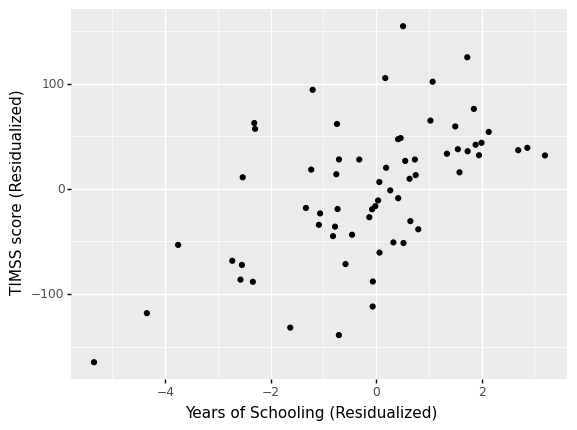

<ggplot: (-9223371905575240404)>

In [26]:
ggplot(data=country_scores) + \
    geom_point(mapping=aes(x='yr_sch_resid', y='TIMSS_resid'), na_rm=True) + \
        xlab('Years of Schooling (Residualized)') +ylab('TIMSS score (Residualized)')

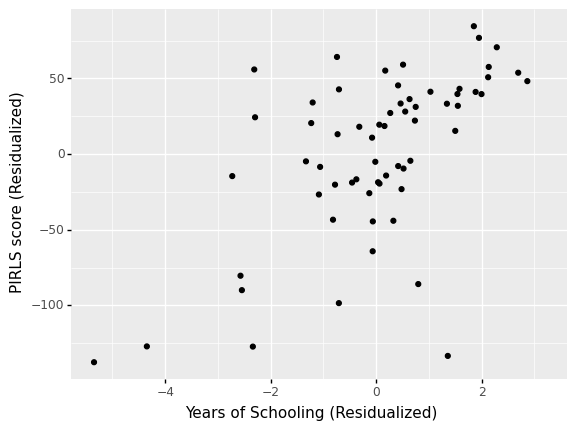

<ggplot: (-9223371905573029752)>

In [27]:
ggplot(data=country_scores) + \
    geom_point(mapping=aes(x='yr_sch_resid', y='PIRLS_resid'), na_rm=True) + \
        xlab('Years of Schooling (Residualized)') +ylab('PIRLS score (Residualized)')

In [28]:
mod = smf.ols("TIMSS_resid~yr_sch_resid", data=country_scores)
TIMSS_yr_sch_res = mod.fit()
TIMSS_yr_sch_res.params
TIMSS_yr_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TIMSS_resid   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     29.30
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           1.03e-06
Time:                        23:14:04   Log-Likelihood:                -350.69
No. Observations:                  65   AIC:                             705.4
Df Residuals:                      63   BIC:                             709.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4155      6.734      0.210      0.834     -12.041      14.872
yr_sch_resid    21.5856      3.988      5.413      0.000      13.617      29.554
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.934
Skew:                           0.370   Prob(JB):                        0.380
Kurtosis:                       3.407   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
mod = smf.ols("PIRLS_resid~yr_sch_resid", data=country_scores)
PIRLS_yr_sch_res = mod.fit()
PIRLS_yr_sch_res.params
PIRLS_yr_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PIRLS_resid   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.96
Date:                Mon, 21 Dec 2020   Prob (F-statistic):           2.27e-07
Time:                        23:14:04   Log-Likelihood:                -326.38
No. Observations:                  63   AIC:                             656.8
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6948      5.509      0.126      0.900     -10.320      11.710
yr_sch_resid    20.2531      3.475      5.828      0.000      13.304      27.202
==============================================================================
Omnibus:                       14.661   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.484
Skew:                          -0.843   Prob(JB):                     2.16e-05
Kurtosis:                       5.311   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the data, none of the two scores are not affected by the years of schooling (taking account of the per capita income)

### Q3: Compare New and Previous Estimates

In [30]:
# getting BL2013_MF1599_v2.2.dta
with ZipFile('Replication Files.zip') as myzip:
    world_bank_estimates = pd.read_stata(myzip.open('Replication Files/DATA/HLO Panel Data (mean, thresh) - Jan 2018.dta'),
                           columns=['country','cntabb','year','low_threshold'])
 
# renaming columns for easier access
header = world_bank_estimates.columns

world_bank_estimates = world_bank_estimates.rename(columns={header[1]: "iso_3"})
world_bank_estimates.head(5)

#get max year
world_bank_estimates = world_bank_estimates.groupby(['iso_3']).max('year').reset_index()
world_bank_estimates.head()

,iso_3,year,low_threshold
0,ADA,2015,73.830002
1,ADU,2015,91.440002
2,ALB,2015,70.650002
3,ARB,2015,67.750000
4,ARE,2015,80.839996


In [31]:
country_scores = country_scores.merge(world_bank_estimates,
                              how='inner',
                              on=['iso_3'])

In [32]:
# TIMSS
X = country_scores[~country_scores['low_threshold'].isnull() & ~country_scores['TIMSS_score'].isnull()]['low_threshold']
Y = country_scores[~country_scores['low_threshold'].isnull() & ~country_scores['TIMSS_score'].isnull()]['TIMSS_score']


print('Spearman', stats.spearmanr(X, Y))

Spearman SpearmanrResult(correlation=0.8918479129013143, pvalue=4.013602929678744e-25)


As you can see from the Spearman test, the relation is positive, which means that as TIMSS_score increase, so do the low_threshold. The value is extremely high so there is a trend between the two values.

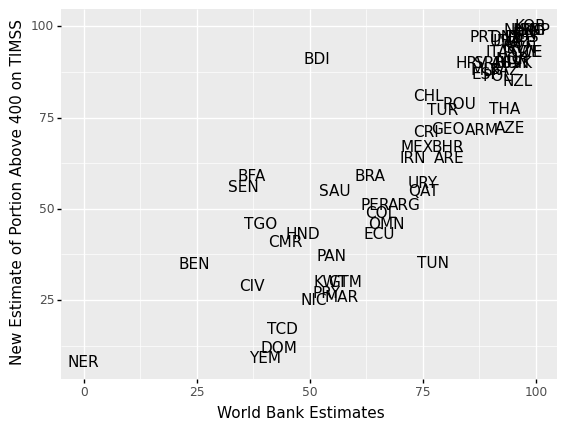

<ggplot: (-9223371905572997628)>

In [33]:
ggplot(data=country_scores) + \
        geom_text(mapping=aes(label='iso_3',x='low_threshold', y='TIMSS_perc'),na_rm=True) +\
        xlab('World Bank Estimates') + ylab('New Estimate of Portion Above 400 on TIMSS') 

In [34]:
# PIRLS
X = country_scores[~country_scores['low_threshold'].isnull() & ~country_scores['PIRLS_score'].isnull()]['low_threshold']
Y = country_scores[~country_scores['low_threshold'].isnull() & ~country_scores['PIRLS_score'].isnull()]['PIRLS_score']


print('Spearman', stats.spearmanr(X, Y))

Spearman SpearmanrResult(correlation=0.8994362695153618, pvalue=4.709483792283552e-25)


As you can see from the Spearman test, the relation is positive, which means that as PIRLS_score increase, so do the low_threshold. The value is extremely high so there is a trend between the two values.

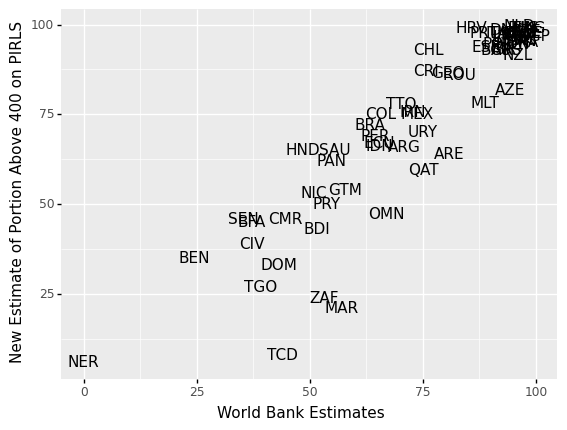

<ggplot: (-9223371905572711888)>

In [35]:
ggplot(data=country_scores) + \
        geom_text(mapping=aes(label='iso_3',x='low_threshold', y='PIRLS_perc'),na_rm=True) +\
        xlab('World Bank Estimates') + ylab('New Estimate of Portion Above 400 on PIRLS')

### Q4: Skills Intensity

* First of all, we will load the data

In [36]:
# getting cw_ind2000_ind1990ddx.dta
with ZipFile('Replication Files.zip') as myzip:
    cw = pd.read_stata(myzip.open('Replication Files/DATA/cw_ind2000_ind1990ddx.dta'))
    
# renaming columns for easier access
header = cw.columns
cw = cw.rename(columns={header[0]: "IND"})
cw.head(5)

,IND,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907


In [37]:
# getting cw_hs6_sic87dd.dta
with ZipFile('Replication Files.zip') as myzip:
    cw_hs6 = pd.read_stata(myzip.open('Replication Files/DATA/cw_hs6_sic87dd.dta'))
cw_hs6.head(5)

,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.0,no weights needed
1,10111.0,272.0,1.0,no weights needed
2,10119.0,272.0,1.0,no weights needed
3,10120.0,272.0,1.0,no weights needed
4,10190.0,272.0,1.0,no weights needed


In [38]:
# getting cw_sic87_ind1990ddx.dta
with ZipFile('Replication Files.zip') as myzip:
    cw_sic87 = pd.read_stata(myzip.open('Replication Files/DATA/cw_sic87_ind1990ddx.dta'))
cw_sic87.head(5)

,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119


 We will calculate the weighted average per industry for college graduates and high school graduates

In [39]:
grads = usa[['IND','PERWT','EDUC']]
sums = grads.groupby(grads.IND).sum('PERWT').reset_index()

college_grad = usa[usa.EDUC>=10][['PERWT','IND']]
hschool_grad = usa[usa.EDUC>=6][['PERWT','IND']]

college = college_grad.groupby(college_grad.IND).sum('PERWT').reset_index()
hschool = hschool_grad.groupby(hschool_grad.IND).sum('PERWT').reset_index()

skills_intensity_industry = sums.merge(college,
                    how='inner',
                    on=['IND'], suffixes=("_sum","_college"))
skills_intensity_industry =  hschool.merge(skills_intensity_industry,
                    how='inner',
                    on=['IND'])
skills_intensity_industry.rename(columns={'PERWT':'PERWT_hschool'},inplace=True)
skills_intensity_industry['hschool_mean']=skills_intensity_industry['PERWT_hschool']/skills_intensity_industry['PERWT_sum']
skills_intensity_industry['college_mean']=skills_intensity_industry['PERWT_college']/skills_intensity_industry['PERWT_sum']
skills_intensity_industry.head()

,IND,PERWT_hschool,PERWT_sum,EDUC,PERWT_college,hschool_mean,college_mean
0,0,28314555.0,108371644.0,441309,5117532.0,0.261273,0.047222
1,17,806904.0,1391515.0,11546,133389.0,0.579874,0.095859
2,18,516534.0,723084.0,6574,70935.0,0.714349,0.098101
3,19,29645.0,32080.0,428,10095.0,0.924096,0.314682
4,27,112982.0,147320.0,1132,7917.0,0.766916,0.053740


We will do the same thing we did above, but we will calculate them for 1990

In [40]:
all2 = cw.merge(grads,
                    how='inner',
                    on=['IND'])
all2
all2['PERWT'] = all2['PERWT']*all2.weight
sums2 = all2.groupby(all2.ind1990ddx).sum('PERWT').reset_index().drop(columns={'IND','EDUC','weight'})


college_grad = all2[all2.EDUC>=10][['PERWT','ind1990ddx']]
hschool_grad = all2[all2.EDUC>=6][['PERWT','ind1990ddx']]

college = college_grad.groupby(college_grad.ind1990ddx).sum('PERWT').reset_index()
hschool = hschool_grad.groupby(hschool_grad.ind1990ddx).sum('PERWT').reset_index()

skills_intensity_industry = sums2.merge(college,
                    how='inner',
                    on=['ind1990ddx'], suffixes=("_sum","_college"))
skills_intensity_industry =  hschool.merge(skills_intensity_industry,
                    how='inner',
                    on=['ind1990ddx'])
skills_intensity_industry.rename(columns={'PERWT':'PERWT_hschool'},inplace=True)

skills_intensity_industry['hschool_mean']=skills_intensity_industry['PERWT_hschool']/skills_intensity_industry['PERWT_sum']
skills_intensity_industry['college_mean']=skills_intensity_industry['PERWT_college']/skills_intensity_industry['PERWT_sum']

skills_intensity_industry.head()

,ind1990ddx,PERWT_hschool,PERWT_sum,PERWT_college,hschool_mean,college_mean
0,10,8.494034e+05,1.453437e+06,143715.767664,0.584410,0.098880
1,11,5.118370e+05,7.165088e+05,70289.965104,0.714349,0.098101
2,20,1.098025e+06,1.539629e+06,233095.390662,0.713175,0.151397
3,31,5.873998e+04,7.577665e+04,16785.693012,0.775172,0.221515
4,32,6.833153e+04,1.070942e+05,18676.408972,0.638051,0.174392


Mapping codes and extract trade flow per exporter and industry:

In [41]:
tmp = cw_hs6.merge(baci, left_on='hs6', right_on='product_category', how='inner')
tmp['adjusted_trade_flow'] = tmp.share * tmp.trade_flow
tmp = tmp.groupby(['exporter','sic87dd']).sum('trade_flow').reset_index()
tmp.head(5)

,exporter,sic87dd,hs6,share,year,importer,product_category,trade_flow,quantity,adjusted_trade_flow
0,4,119.0,1883727.0,25.552067,52468,13844,1883727,68291.848724,108970.987,68290.428330
1,4,131.0,2600500.0,5.000000,10090,3118,2600500,39698.892614,29582.653,39698.892614
2,4,132.0,240130.0,1.000000,2018,586,240130,43.993665,23.818,43.993665
3,4,134.0,280760.0,4.000000,8072,2352,280760,380.462682,4479.940,380.462682
4,4,139.0,4671499.0,33.851410,78702,19237,4671499,14319.923893,8867.730,13308.065785


Merging the appropriate data:

In [42]:
exports = cw_sic87.merge(tmp, left_on='sic87', right_on='sic87dd', how='inner')
exports.head(5)

,ind1990ddx,sic87,exporter,sic87dd,hs6,share,year,importer,product_category,trade_flow,quantity,adjusted_trade_flow
0,10,112,31,112.0,100610.0,1.0,2018,398,100610,8.024000,6.102000,8.024000
1,10,112,32,112.0,402440.0,4.0,8072,1592,402440,1348.391771,1213.404000,1348.391771
2,10,112,36,112.0,100610.0,1.0,2018,598,100610,466.484000,1151.544000,466.484000
3,10,112,40,112.0,1207320.0,12.0,24216,5513,1207320,149.945440,101.583709,149.945440
4,10,112,48,112.0,402440.0,4.0,8072,2436,402440,87.404000,28.415000,87.404000


In [43]:
exports = exports.merge(codes, left_on='exporter', right_on='country_code', how='inner')
exports.drop(['country_name_full','iso_2','country_name_abbreviation','quantity','importer','trade_flow','product_category','hs6'],axis=1,inplace=True)
exports.head(5)

,ind1990ddx,sic87,exporter,sic87dd,share,year,adjusted_trade_flow,country_code,iso_3
0,10,112,31,112.0,1.000000,2018,8.024000,31,AZE
1,10,115,31,115.0,1.978214,4036,52.160484,31,AZE
2,10,119,31,119.0,15.716060,36324,2312.346783,31,AZE
3,10,131,31,131.0,9.000000,18162,80377.093494,31,AZE
4,10,132,31,132.0,7.000000,14126,12685.514992,31,AZE


In [44]:
country_scores = country_scores[['iso_3','TIMSS_perc', 'PIRLS_perc', 'TIMSS_score',
       'PIRLS_score']]
final = exports.merge(skills_intensity_industry, on='ind1990ddx', how='inner')
final = final.merge(country_scores,on='iso_3',how='inner')
final = final[['iso_3','exporter','sic87dd', 'TIMSS_score',
       'PIRLS_score','adjusted_trade_flow','hschool_mean','college_mean']]
final.head()

,iso_3,exporter,sic87dd,TIMSS_score,PIRLS_score,adjusted_trade_flow,hschool_mean,college_mean
0,AZE,31,112.0,465.0,467.0,8.024000,0.58441,0.09888
1,AZE,31,115.0,465.0,467.0,52.160484,0.58441,0.09888
2,AZE,31,119.0,465.0,467.0,2312.346783,0.58441,0.09888
3,AZE,31,131.0,465.0,467.0,80377.093494,0.58441,0.09888
4,AZE,31,132.0,465.0,467.0,12685.514992,0.58441,0.09888


Creating for final regressions

In [45]:
# creating V_ci
final['V_ci'] = np.log(final.adjusted_trade_flow)

# creating TIMSS_c and and PIRLS_c
final.TIMSS_score = final.TIMSS_score/1000
final.PIRLS_score = final.PIRLS_score/1000
final.head()

,iso_3,exporter,sic87dd,TIMSS_score,PIRLS_score,adjusted_trade_flow,hschool_mean,college_mean,V_ci
0,AZE,31,112.0,0.465,0.467,8.024000,0.58441,0.09888,2.082437
1,AZE,31,115.0,0.465,0.467,52.160484,0.58441,0.09888,3.954325
2,AZE,31,119.0,0.465,0.467,2312.346783,0.58441,0.09888,7.746018
3,AZE,31,131.0,0.465,0.467,80377.093494,0.58441,0.09888,11.294485
4,AZE,31,132.0,0.465,0.467,12685.514992,0.58441,0.09888,9.448216


First regression:
$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

In [46]:
mod = smf.ols("V_ci~TIMSS_score:college_mean + sic87dd + iso_3 ", data=final[['V_ci','TIMSS_score','college_mean','iso_3','sic87dd']])
one = mod.fit()
one.params
one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   V_ci   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     426.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:14:11   Log-Likelihood:                -65651.
No. Observations:               27490   AIC:                         1.314e+05
Df Residuals:                   27418   BIC:                         1.320e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.9283      0.136     73.258      0.000       9.663      10.194
iso_3[T.ARG]                -2.3022      0.180    -12.811      0.000      -2.654      -1.950
iso_3[T.ARM]                -5.4003      0.186    -29.077      0.000      -5.764      -5.036
iso_3[T.AUS]                -0.6633      0.179     -3.702      0.000      -1.014      -0.312
iso_3[T.AUT]                 0.4604      0.179      2.572      0.010       0.109       0.811
iso_3[T.AZE]                -5.6961      0.187    -30.402      0.000      -6.063      -5.329
iso_3[T.BDI]                -8.8362      0.270    -32.780      0.000      -9.365      -8.308
iso_3[T.BEN]                -8.4481      0.226    -37.396      0.000      -8.891      -8.005
iso_3[T.BFA]                -8.1573      0.210    -38.792      0.000      -8.569      -7.745
iso_3[T.BGR]             -1.328e-11   2.69e-12     -4.943      0.000   -1.85e-11   -8.01e-12
iso_3[T.BHR]                -3.8218      0.183    -20.902      0.000      -4.180      -3.463
iso_3[T.BRA]                -0.3950      0.179     -2.208      0.027      -0.746      -0.044
iso_3[T.CAN]             -1.165e-12   2.35e-13     -4.948      0.000   -1.63e-12   -7.04e-13
iso_3[T.CHL]                -2.2888      0.180    -12.737      0.000      -2.641      -1.937
iso_3[T.CIV]                -4.8560      0.184    -26.320      0.000      -5.218      -4.494
iso_3[T.CMR]                -6.6715      0.193    -34.558      0.000      -7.050      -6.293
iso_3[T.COG]                -7.3077      0.212    -34.516      0.000      -7.723      -6.893
iso_3[T.COL]                -2.3872      0.180    -13.290      0.000      -2.739      -2.035
iso_3[T.CRI]                -3.6576      0.181    -20.220      0.000      -4.012      -3.303
iso_3[T.CZE]                 0.4068      0.179      2.275      0.023       0.056       0.757
iso_3[T.DEU]                 2.6932      0.179     15.066      0.000       2.343       3.044
iso_3[T.DNK]                -0.1702      0.179     -0.950      0.342      -0.521       0.181
iso_3[T.DOM]                -4.5850      0.185    -24.798      0.000      -4.947      -4.223
iso_3[T.ECU]                -4.4592      0.182    -24.448      0.000      -4.817      -4.102
iso_3[T.ESP]                 1.3074      0.179      7.316      0.000       0.957       1.658
iso_3[T.FIN]                -1.1212      0.179     -6.260      0.000      -1.472      -0.770
iso_3[T.FRA]              2.037e-16   1.21e-16      1.686      0.092   -3.32e-17    4.41e-16
iso_3[T.GEO]                -5.5377      0.185    -29.942      0.000      -5.900      -5.175
iso_3[T.GTM]                -4.1807      0.183    -22.838      0.000      -4.539      -3.822
iso_3[T.HKG]                -0.7090      0.180     -3.950      0.000      -1.061      -0.357
iso_3[T.HND]  

Second regression:
$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

In [47]:
mod = smf.ols("V_ci~PIRLS_score:college_mean + sic87dd + iso_3", data=final[['V_ci','PIRLS_score','college_mean','iso_3','sic87dd']])
two = mod.fit()
two.params
two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   V_ci   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     439.9
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:14:11   Log-Likelihood:                -62854.
No. Observations:               26401   AIC:                         1.258e+05
Df Residuals:                   26332   BIC:                         1.264e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.9970      0.135     74.158      0.000       9.733      10.261
iso_3[T.ARG]                -2.3183      0.178    -12.997      0.000      -2.668      -1.969
iso_3[T.ARM]             -1.666e-11   1.82e-12     -9.133      0.000   -2.02e-11   -1.31e-11
iso_3[T.AUS]                -0.6759      0.178     -3.800      0.000      -1.024      -0.327
iso_3[T.AUT]                 0.4416      0.178      2.484      0.013       0.093       0.790
iso_3[T.AZE]                -5.6950      0.186    -30.623      0.000      -6.060      -5.330
iso_3[T.BDI]                -8.7646      0.268    -32.758      0.000      -9.289      -8.240
iso_3[T.BEN]                -8.4431      0.224    -37.652      0.000      -8.883      -8.004
iso_3[T.BFA]                -8.1298      0.209    -38.947      0.000      -8.539      -7.721
iso_3[T.BGR]                -1.2618      0.178     -7.099      0.000      -1.610      -0.913
iso_3[T.BHR]             -7.038e-14   7.72e-15     -9.114      0.000   -8.55e-14   -5.52e-14
iso_3[T.BRA]                -0.4180      0.178     -2.354      0.019      -0.766      -0.070
iso_3[T.CAN]                 0.7445      0.177      4.195      0.000       0.397       1.092
iso_3[T.CHL]                -2.3248      0.178    -13.030      0.000      -2.675      -1.975
iso_3[T.CIV]                -4.8724      0.183    -26.611      0.000      -5.231      -4.514
iso_3[T.CMR]                -6.6768      0.192    -34.846      0.000      -7.052      -6.301
iso_3[T.COG]                -7.3121      0.210    -34.797      0.000      -7.724      -6.900
iso_3[T.COL]                -2.4294      0.178    -13.628      0.000      -2.779      -2.080
iso_3[T.CRI]                -3.6939      0.180    -20.572      0.000      -4.046      -3.342
iso_3[T.CZE]                 0.3764      0.178      2.120      0.034       0.028       0.724
iso_3[T.DEU]                 2.6797      0.177     15.100      0.000       2.332       3.028
iso_3[T.DNK]                -0.1871      0.178     -1.052      0.293      -0.536       0.161
iso_3[T.DOM]                -4.6215      0.183    -25.200      0.000      -4.981      -4.262
iso_3[T.ECU]                -4.4871      0.181    -24.788      0.000      -4.842      -4.132
iso_3[T.ESP]                 1.2814      0.177      7.223      0.000       0.934       1.629
iso_3[T.FIN]                -1.1418      0.178     -6.421      0.000      -1.490      -0.793
iso_3[T.FRA]                 1.6801      0.177      9.470      0.000       1.332       2.028
iso_3[T.GEO]                -5.5661      0.184    -30.315      0.000      -5.926      -5.206
iso_3[T.GTM]                -4.2291      0.182    -23.286      0.000      -4.585      -3.873
iso_3[T.HKG]                -0.6899      0.178     -3.875      0.000      -1.039      -0.341
iso_3[T.HND]  

Third regression:
    $$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In [48]:
mod = smf.ols("V_ci~TIMSS_score:hschool_mean + sic87dd + iso_3", data=final[['V_ci','TIMSS_score','hschool_mean','iso_3','sic87dd']])
three = mod.fit()
three.params
three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   V_ci   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     425.7
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:14:12   Log-Likelihood:                -65661.
No. Observations:               27490   AIC:                         1.315e+05
Df Residuals:                   27418   BIC:                         1.321e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.8409      0.175     50.405      0.000       8.497       9.185
iso_3[T.ARG]                -2.2140      0.180    -12.296      0.000      -2.567      -1.861
iso_3[T.ARM]                -5.4470      0.186    -29.306      0.000      -5.811      -5.083
iso_3[T.AUS]                -0.9051      0.181     -4.992      0.000      -1.260      -0.550
iso_3[T.AUT]                 0.2474      0.181      1.369      0.171      -0.107       0.602
iso_3[T.AZE]                -5.7694      0.188    -30.751      0.000      -6.137      -5.402
iso_3[T.BDI]                -8.9140      0.270    -33.034      0.000      -9.443      -8.385
iso_3[T.BEN]                -8.2946      0.227    -36.594      0.000      -8.739      -7.850
iso_3[T.BFA]                -8.0958      0.210    -38.471      0.000      -8.508      -7.683
iso_3[T.BGR]              5.599e-11   2.45e-12     22.816      0.000    5.12e-11    6.08e-11
iso_3[T.BHR]                -3.8206      0.183    -20.888      0.000      -4.179      -3.462
iso_3[T.BRA]                -0.3211      0.179     -1.792      0.073      -0.672       0.030
iso_3[T.CAN]              1.537e-12   6.74e-14     22.803      0.000     1.4e-12    1.67e-12
iso_3[T.CHL]                -2.3643      0.180    -13.138      0.000      -2.717      -2.012
iso_3[T.CIV]                -4.6288      0.186    -24.838      0.000      -4.994      -4.264
iso_3[T.CMR]                -6.4786      0.194    -33.338      0.000      -6.859      -6.098
iso_3[T.COG]                -7.0820      0.213    -33.214      0.000      -7.500      -6.664
iso_3[T.COL]                -2.2518      0.180    -12.485      0.000      -2.605      -1.898
iso_3[T.CRI]                -3.6282      0.181    -20.046      0.000      -3.983      -3.273
iso_3[T.CZE]                 0.1837      0.181      1.017      0.309      -0.170       0.538
iso_3[T.DEU]                 2.4233      0.181     13.355      0.000       2.068       2.779
iso_3[T.DNK]                -0.4698      0.182     -2.576      0.010      -0.827      -0.112
iso_3[T.DOM]                -4.1940      0.190    -22.044      0.000      -4.567      -3.821
iso_3[T.ECU]                -4.3182      0.183    -23.574      0.000      -4.677      -3.959
iso_3[T.ESP]                 1.1644      0.179      6.487      0.000       0.813       1.516
iso_3[T.FIN]                -1.4471      0.183     -7.910      0.000      -1.806      -1.088
iso_3[T.FRA]              1.007e-15   1.03e-16      9.789      0.000    8.06e-16    1.21e-15
iso_3[T.GEO]                -5.5892      0.185    -30.194      0.000      -5.952      -5.226
iso_3[T.GTM]                -3.9223      0.185    -21.144      0.000      -4.286      -3.559
iso_3[T.HKG]                -1.1978      0.188     -6.371      0.000      -1.566      -0.829
iso_3[T.HND]  

Forth regression:
    $$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In [49]:
mod = smf.ols("V_ci~PIRLS_score:hschool_mean + sic87dd + iso_3", data=final[['V_ci','PIRLS_score','hschool_mean','iso_3','sic87dd']])
four = mod.fit()
four.params
four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   V_ci   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     439.0
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:14:12   Log-Likelihood:                -62868.
No. Observations:               26401   AIC:                         1.259e+05
Df Residuals:                   26332   BIC:                         1.264e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    8.8597      0.173     51.248      0.000       8.521       9.199
iso_3[T.ARG]                -2.2918      0.178    -12.840      0.000      -2.642      -1.942
iso_3[T.ARM]              3.172e-12    2.4e-12      1.324      0.186   -1.53e-12    7.87e-12
iso_3[T.AUS]                -0.9611      0.180     -5.325      0.000      -1.315      -0.607
iso_3[T.AUT]                 0.1625      0.180      0.901      0.368      -0.191       0.516
iso_3[T.AZE]                -5.7682      0.186    -30.972      0.000      -6.133      -5.403
iso_3[T.BDI]                -8.5883      0.268    -32.011      0.000      -9.114      -8.062
iso_3[T.BEN]                -8.2834      0.225    -36.815      0.000      -8.724      -7.842
iso_3[T.BFA]                -7.9746      0.209    -38.079      0.000      -8.385      -7.564
iso_3[T.BGR]                -1.5669      0.181     -8.668      0.000      -1.921      -1.213
iso_3[T.BHR]              8.457e-14   6.09e-14      1.388      0.165   -3.48e-14    2.04e-13
iso_3[T.BRA]                -0.4316      0.178     -2.430      0.015      -0.780      -0.083
iso_3[T.CAN]                 0.4090      0.181      2.258      0.024       0.054       0.764
iso_3[T.CHL]                -2.5358      0.180    -14.095      0.000      -2.888      -2.183
iso_3[T.CIV]                -4.7135      0.184    -25.621      0.000      -5.074      -4.353
iso_3[T.CMR]                -6.5114      0.192    -33.827      0.000      -6.889      -6.134
iso_3[T.COG]                -7.1180      0.211    -33.710      0.000      -7.532      -6.704
iso_3[T.COL]                -2.4571      0.178    -13.774      0.000      -2.807      -2.107
iso_3[T.CRI]                -3.8033      0.180    -21.127      0.000      -4.156      -3.450
iso_3[T.CZE]                 0.0446      0.181      0.246      0.805      -0.310       0.400
iso_3[T.DEU]                 2.3652      0.181     13.089      0.000       2.011       2.719
iso_3[T.DNK]                -0.5445      0.182     -2.993      0.003      -0.901      -0.188
iso_3[T.DOM]                -4.3781      0.185    -23.625      0.000      -4.741      -4.015
iso_3[T.ECU]                -4.4555      0.181    -24.595      0.000      -4.811      -4.100
iso_3[T.ESP]                 1.0451      0.179      5.829      0.000       0.694       1.397
iso_3[T.FIN]                -1.5386      0.183     -8.415      0.000      -1.897      -1.180
iso_3[T.FRA]                 1.4258      0.180      7.940      0.000       1.074       1.778
iso_3[T.GEO]                -5.7247      0.184    -31.029      0.000      -6.086      -5.363
iso_3[T.GTM]                -4.1597      0.182    -22.872      0.000      -4.516      -3.803
iso_3[T.HKG]                -1.1000      0.183     -5.997      0.000      -1.460      -0.740
iso_3[T.HND]  

All the regressions seem to be good because they all have a decent R-squared and the majority of most of the p-values are zero. 